In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

In [ ]:
sns.pairplot(df[['MedHouseVal','MedInc','HouseAge','AveRooms']])
plt.show()

In [ ]:
x = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_with_const = sm.add_constant(xtrain)
vif = pd.DataFrame()
vif['feature'] = x_with_const.columns
vif['VIF'] = [variance_inflation_factor(x_with_const.values,i)
              for i in range(x_with_const.shape[1])]
vif

In [ ]:
model = LinearRegression()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

print('Intercept:',model.intercept_)
print('Coefficients:',model.coef_)

In [ ]:
threshold = 5
high_vif = vif[vif['VIF'] > threshold]['feature'].tolist()
print('Features with VIF > 5 : ',high_vif)

In [ ]:
x_reduced = x.drop('AveBedrms',axis=1)

xtrainr,xtestr,ytrainr,ytestr = train_test_split(x_reduced,y,test_size=0.2,random_state=42)

model_reduced = LinearRegression()
model_reduced.fit(xtrainr,ytrainr)
y_pred_r = model_reduced.predict(xtestr)

mae_r = mean_absolute_error(ytestr,y_pred_r)
mse_r = mean_squared_error(ytestr,y_pred_r)
rmse_r = np.sqrt(mse_r)
r2_r = r2_score(ytestr,y_pred_r)

n_r = xtestr.shape[0]
k_r = xtestr.shape[1]
adj_r2_r = 1 - (1-r2_r)*(n_r-1)/(n_r-k_r-1)

print("Reduced Model (after dropping AveBedrms)")
print(f"MAE: {mae_r:.3f}")
print(f"MSE: {mse_r:.3f}")
print(f"RMSE: {rmse_r:.3f}")
print(f"R²: {r2_r:.3f}")
print(f"Adjusted R²: {adj_r2_r:.3f}")

In [ ]:
coef_full = pd.Series(model.coef_,index =x.columns)
coef_reduced = pd.Series(model_reduced.coef_,index=x_reduced.columns)

print('Original Coef')
print(coef_full)
print('Reduced Coef')
print(coef_reduced)

In [ ]:
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)

n = xtest.shape[0]
k = xtest.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-k-1)
print("Full Model Metrics")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"Adjusted R²: {adj_r2:.3f}")


In [ ]:
df_cat = pd.DataFrame({
    "Size": [1000, 1500, 2000, 2500, 1800],
    "Bedrooms": [2, 3, 3, 4, 2],
    "Location": ["A", "B", "A", "C", "B"],
    "Price": [200000, 250000, 300000, 400000, 280000]
})

df_encoded = pd.get_dummies(df_cat, columns=["Location"], drop_first=True)
df_encoded

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Target
y = df["MedHouseVal"]

# --- 1. Univariate Regression (MedInc only) ---
X_uni = df[["MedInc"]]
model_uni = LinearRegression().fit(X_uni, y)
print("Univariate R² (MedInc only):", model_uni.score(X_uni, y))

# --- 2. Bivariate Regression (MedInc + HouseAge) ---
X_bi = df[["MedInc", "HouseAge"]]
model_bi = LinearRegression().fit(X_bi, y)
print("Bivariate R² (MedInc + HouseAge):", model_bi.score(X_bi, y))

# --- 3. Multivariate Regression (all predictors) ---
X_multi = df.drop(columns=["MedHouseVal"])
model_multi = LinearRegression().fit(X_multi, y)
print("Multivariate R² (All features):", model_multi.score(X_multi, y))


In [ ]:
plt.scatter(X_uni,y,alpha=0.3)
plt.plot(X_uni,model_uni.predict(X_uni),color='red',label= "Best fit Line")


c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


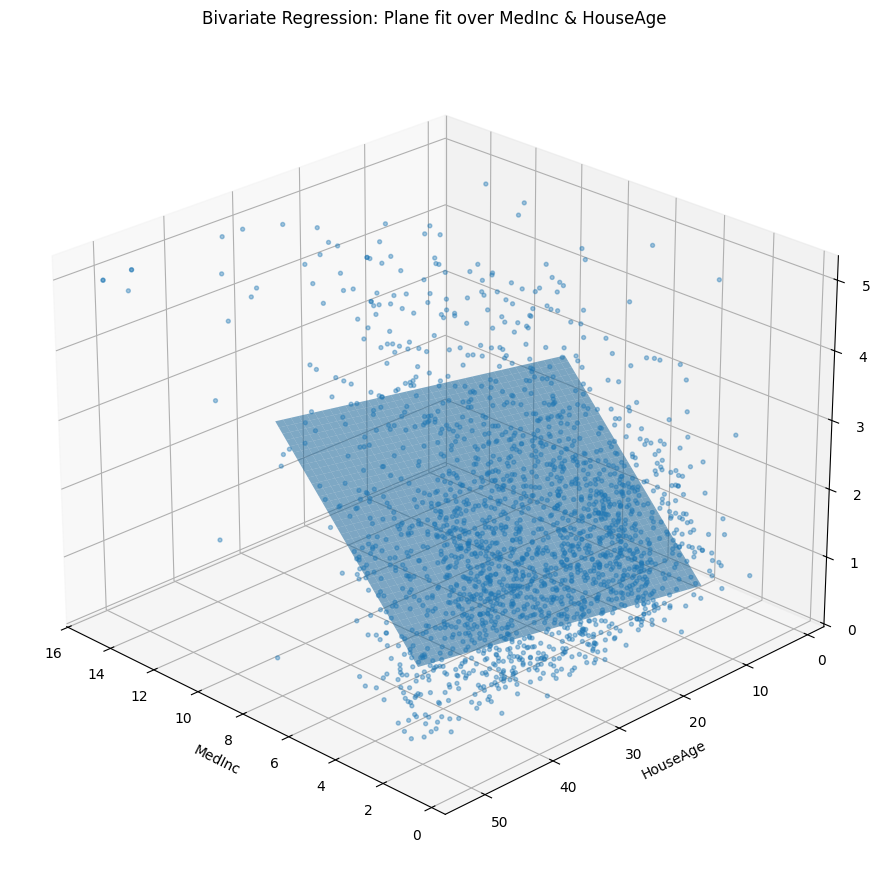

R² (MedInc + HouseAge): 0.5091
Plane equation: y = 0.4317*MedInc + 0.0174*HouseAge + -0.1019


In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import axes3d

df_plot = df.sample(n=min(len(df),2000),random_state=42).copy()

medinc_lin = np.linspace(np.percentile(df_plot['MedInc'],5),
                         np.percentile(df_plot['MedInc'],95),40)

houseage_lin = np.linspace(np.percentile(df_plot['HouseAge'],5),
                           np.percentile(df_plot['HouseAge'],95),40)

G1,G2 =np.meshgrid(medinc_lin,houseage_lin)
x_grid = np.c_[G1.ravel(),G2.ravel()]
z = model_bi.predict(x_grid).reshape(G1.shape)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df_plot['MedInc'],df_plot['HouseAge'],df_plot['MedHouseVal'],s=8,alpha=0.4,depthshade=True)

ax.plot_surface(G1,G2,z,alpha=0.55,edgecolor='none')

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("MedHouseVal")
ax.set_title("Bivariate Regression: Plane fit over MedInc & HouseAge")
ax.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()

print("R² (MedInc + HouseAge):", round(model_bi.score(X_bi, y), 4))
print("Plane equation: y = {:.4f}*MedInc + {:.4f}*HouseAge + {:.4f}"
      .format(model_bi.coef_[0], model_bi.coef_[1], model_bi.intercept_))
